## Logistic regression

In the first part of this exercise, we'll build a logistic regression model to predict whether a patient will going to get a cardiac arrest.  Suppose that you are a cardiologist and you want to determine each patient's chance of getting a heart attack based on the body measurments. You have historical data from previous patients that you can use as a training set for logistic regression.  To accomplish this, we're going to build a classification model that estimates the probability of admission based on the exam scores.

Let's start by examining the data.

In [2]:
#!/usr/bin/env python3
 
##########################################################
# Copyright (c) Jesper Vang <jesper_vang@me.com>         #
# Created on 3 Aug 2021                                 #
# Version:	0.0.1                                        #
# What:  						                         #
##########################################################

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import os
from sklearn.model_selection import train_test_split

print("Pandas Version: {}".format(pd.__version__))
print("Numpy Version: {}".format(np.__version__))
print("Matplotlib Version: {}".format(matplotlib.__version__))
print("Scikit-learn Version: {}".format(sklearn.__version__))
print("Seaborn Version: {}".format(sns.__version__))
np.set_printoptions(suppress=True, linewidth=130)


%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 8)

print(f'the present working directory is: {os.getcwd()}')
DATA_PATH = os.path.join("data")
PROJECT_ROOT_DIR = "."

def load_model_data(data):
    pwd = os.getcwd() 
    filepath = os.path.join(pwd, DATA_PATH, data) 
    return pd.read_csv(filepath)     
    
data = load_model_data("heart.csv");


Pandas Version: 1.3.0
Numpy Version: 1.19.5
Matplotlib Version: 3.4.2
Scikit-learn Version: 0.24.2
Seaborn Version: 0.11.1
the present working directory is: /Users/jvang/Documents/Projects/Applied_AI_IT_Uni/day02


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jvang/Documents/Projects/Applied_AI_IT_Uni/day02/data/heart.csv'

In [3]:
# The data is loaded
data = pd.read_csv("data/heart.csv", sep=",")

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/heart.csv'


## Explore the data a bit.
### List:

1.   First few rows
2.   Basic statistic
3.   .info()
4.   Column names


In [ ]:
# The listing:
# 1 First few rows
data.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [ ]:
# 2 Basic statistics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# 3 info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [ ]:
# 4 Column names
columns = data.columns
columns

Index([u'age', u'sex', u'cp', u'trestbps', u'chol', u'fbs', u'restecg',
       u'thalach', u'exang', u'oldpeak', u'slope', u'ca', u'thal', u'target'],
      dtype='object')

Questions:

1. What is the dependent variable (column name)?

It is the 'target'.

2. What are the independent variables?

  The rest of the variables in the data set, 

  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

3. Should we normalize the data?

No, we don't need to normalize it.

4. What are the column data-types?

All columns are integers except for the "oldpeak", which is float. 

# Exploratory Data Analysis (EDA)

Create some simple plots to check out the data!

1.   Plot the pairwise scatter-plot between each column
2.   Plot the distribution of the values of the dependent variable
3.   Plot the pairwise correlation heatmap of each column.

Answer questions:

1.  What are the assumptions of the linear regression model?
2.  Can we accept the basic assumptions of the linear regression model?
3.  Judging by the scatter-plots, do you see any patterns in the data?
4.  Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?
5.  Are there correlations among independent variables?

First we need to create a sigmoid function.

Task:
1.  Implement the function

In [ ]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

Make sure the function is correctly implemented.

Task:
1.  Plot the function.

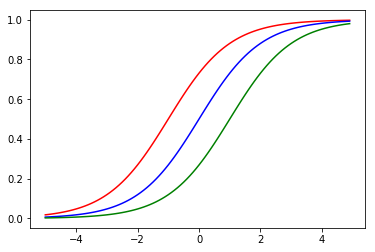

In [ ]:
domain_x = np.arange(-5,5,0.1)
sns.lineplot(domain_x, sigmoid(domain_x*1+1), color="red")
sns.lineplot(domain_x, sigmoid(domain_x*1+0), color="blue") # more steep
sns.lineplot(domain_x, sigmoid(domain_x*1-1), color="green")

Task:
1. Write the cost function to evaluate a solution.

In [ ]:
def cost(x, y, Theta):
    n = x.shape[0] # number of samples
    h = sigmoid(np.dot(x, Theta))

    loss = -(1.0 / n) * np.sum(y * np.log(h) + (1.0 - y) * np.log(1.0 - h))
  #  loss = np.sum((1.0 - y) * np.log(1.0 - h))
   # print("h ", h)

    return loss

Task:
1. Separate the data to `X` and `y` arrays.
2. Separate the training set and evaluation set.

In [ ]:
# The dependent variable is selected as y
y = data["target"]

# The independent variables are selected. The address is discarted, as it is strings and does not make sense to include in the linear regression
x = data.drop(["target"], axis=1)
x['Intercept'] = 0

# Split the data here - I select the test_size to be 20% of the data set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Task:
1. Check the shape of our arrays to make sure everything looks good.

In [ ]:
print("Size of the x data: train", x_train.shape, "test: ", x_test.shape)
print("Size of the y data: train", y_train.shape, "test: ", y_test.shape)

('Size of the x data: train', (242, 14), 'test: ', (61, 14))
('Size of the y data: train', (242,), 'test: ', (61,))


Task:
1. Compute the cost for our initial solution (eyeball the initial value, e.g. zero).

In [ ]:
variables = x_train.shape[1]
init_theta = np.zeros(variables, dtype=float) # initializing theta as zeroes

init_cost = cost(x_train, y_train, init_theta) # calculating the initial cost
print("The initial cost is: ", init_cost)

('The initial cost is: ', 0.6931471805599453)


Task:
  Implement a function to compute the gradient (parameter updates) given our training data, labels, and model parameters.

In [ ]:
#Hint: you can either use PyTorch to calculate the  gradient (so don't fill the "gradient code"),
# or you can implement your own gradient descent using the gradient implementation shown in the slides;
def gradient(x, y, Theta):
   n = x.shape[0] # number of samples
   h = sigmoid(np.dot(x, Theta))
#   init_cost = cost(x_train, y_train, Theta)

 #  grad = Theta - mu * 1/n * (np.sum(h-y) * x).sum(axis=0)

#   c = cost(x, y, Theta)

   grad = 1.0/n * np.dot(x.T, (h - y)) 

   return grad

In [ ]:
mu = 0.00005 # stepsize
variables = x_train.shape[1]
init_theta = np.zeros(variables, dtype=float) # initializing theta as zeroes
init_cost = cost(x_train, y_train, init_theta)

new_cost = 0
m = 200000 
i = 0

# We update the betas untill the new cost does not decrease OR we reach m iterations
while ((new_cost < init_cost) and (i < m)):
  init_cost = cost
  i += 1
  gd_theta = gradient(x_train, y_train, init_theta)
  updated_weights = init_theta - gd_theta * mu
  new_cost = cost(x_train, y_train, updated_weights)

  if i%(m/20)==0:
   print(new_cost)
  init_theta = updated_weights



0.5616672598468117
0.5300401973863811
0.5054336026763092
0.4859939700199651
0.4703911938729674
0.45767568533927194
0.4471654789307523
0.43836519599095913
0.4309100133549789
0.4245273509079177
0.4190106278995324
0.41420113638611344
0.4099753764977405
0.4062360930747282
0.4029058470971068
0.3999223441103132
0.3972349960595744
0.3948023600546108
0.3925902084124262
0.3905700586112719


Task:
1. Use PyTorch to optimize the model parameters using gradient descent (SGD, for example) based on the training set. 

Task:
1. Calculate the cost for the optimized parameters

In [ ]:
#### Result to benchmark - delete for handing in ####
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

NameError: name 'x_train' is not defined

In [ ]:
print(logreg.coef_)
cost(x_train, y_train, logreg.coef_[0])

[[ 0.00663728 -1.35694655  0.78896382 -0.01257611 -0.0023455   0.12991375
   0.5247914   0.02605102 -0.89196157 -0.61335404  0.66347046 -0.77198348
  -0.85912547  0.        ]]


0.36101411981788106

Task:
1. Write a function that will output predictions for a dataset X using our learned parameters.
2. Use this function to score and print the training accuracy of our classifier.

In [ ]:
def predict(x, Theta):
  prediction = sigmoid(np.dot(x, Theta))
  
  return prediction

In [ ]:
# Hint: Accuracy is calculated  like: correctly classified samples / all samples

pred = np.round(predict(x_test, updated_weights))

# I find the accuracy
accuracy = (y_test == pred).sum() / float(len(y_test))

print("The accuracy is: ", accuracy)

('The accuracy is: ', 0.8360655737704918)
